In [1]:
!pip install astropy

# The Lambda-CDM Model

The Lambda-CDM Model is the simplest model of cosmology to a reasonable accuracy, with three key components:

1.   A cosmological constant (i.e. dark energy)
2.   Cold dark matter
3.   Ordinary matter



In [2]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM, LambdaCDM, z_at_value

We can define our cosmology model using one of the several included classes. For a Lambda CDM model, we need to provide the Hubble constant and the current matter and dark energy density parameters. By default, the CMB temperature is set to zero, so let's choose to set it to 2.7K in accordance with observational data.

In [20]:
lcdm_cosmo = LambdaCDM(H0=68*u.km/u.s/u.Mpc, Om0=0.3, Ode0=0.7, Tcmb0=2.7)

Notice how we need to define the units of the Hubble constant. To do this, we use the astropy units class, which makes it super easy to keep track of units and conversions. The CMB temperature uses default Kelvin units.

Using our defined model, we can extract information about the universe in one line, given a redshift. There are also several attributes encoding this information at $z=0$. The full list of methods and attributes for each cosmology class can be found in the [API](https://docs.astropy.org/en/stable/cosmology/ref_api.html).

In [21]:
print(dir(lcdm_cosmo))

['H', 'H0', 'Neff', 'Ob', 'Ob0', 'Ode', 'Ode0', 'Odm', 'Odm0', 'Ogamma', 'Ogamma0', 'Ok', 'Ok0', 'Om', 'Om0', 'Onu', 'Onu0', 'Otot', 'Otot0', 'Tcmb', 'Tcmb0', 'Tnu', 'Tnu0', '_EdS_age', '_EdS_comoving_distance_z1z2', '_EdS_lookback_time', '_H0', '_Neff', '_Ob0', '_Ode0', '_Odm0', '_Ogamma0', '_Ok0', '_Om0', '_Onu0', '_T_hypergeometric', '_Tcmb0', '_Tnu0', '__abstractmethods__', '__annotations__', '__astropy_table__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__equiv__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__signature__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_abs_distance_integrand_scalar', '_age', '_comoving_distance_z1z2', '_comoving_transverse_distance_z1z2', '_

A common example would be finding the current age of the universe, using this model.

In [22]:
age = lcdm_cosmo.age(0) # at z=0
print(age)

13.857903313780364 Gyr


As such, we can see that the default units of age are in Gyr.

In [16]:
print(age.unit)

Gyr


# The z_at_value Function

Most methods take redshift as their argument, but it is possible to 'work backwards' to get the redshift (or another parameter) from a parameter. Say, we want to know what the age of the universe at recombination, given we know the CMB temperature but not the redshift (e.g. from the Saha equation). We can use the z_at_value function to find the redshift z at $T_{CMB}(z)=3000K$, and then find the age using that redshift.

In [23]:
z_at_rec = z_at_value(lcdm_cosmo.Tcmb, 3000*u.K)  # notice you must specify the units!

CosmologyError: Best guess z=999.9999897541522 is very close to the upper z limit 1000.0.
Try re-running with a different zmax.

Here we have run into a problem: z_at_value takes zmin and zmax as parameters, which define the upper and lower search limits for the redshift. By default these are set to 0 and 1000, respectively. This is handy in cases where there may be several solutions, or for where you may want to exclude diverging behaviour at $z=0$. In this case, an error was raised because the redshift at recombination is greater than 1000, so we can modify zmax to accommodate that.

In [24]:
z_at_rec = z_at_value(lcdm_cosmo.Tcmb, 3000*u.K, zmax=1200)  # now with a higher zmax
print(z_at_rec)

age_at_rec = lcdm_cosmo.age(z_at_rec)

# the to() method creates a new quantity in the given unit
# the default units for age is in Gyr, so we want to convert that to years
age_at_rec_yr = age_at_rec.to(u.yr)
print(age_at_rec_yr)

1110.1111063003887 redshift
366014.87835514627 yr


# A Universe with Flat Curvature

Now, let's try imposing the constraint of a flat universe. This means that we will no longer need to specify the dark energy density parameter, since it is fixed by $\Omega_{k,0}=0$. One key drawback of astropy is that not all density parameters can be set directly; $\Omega_{k,0}$ and $\Omega_{\gamma,0}$ can both only be inferred by the model.

Given our earlier model, there are a couple ways we can impose this new constraint. Looking at the curvature density parameter, we see that while it is non-zero, it is within a rounding error. A disadvantage of Astropy is its lack of in-built handling of uncertainties.

In [25]:
print(lcdm_cosmo.Ok0)

-8.706896022255479e-05


So in order to have a flat model, we'll want to use a class that has 'Flat' in the name (most classes have a flat equivalent). Let's try making an Einstein de Sitter universe using a FlatLambdaCDM model. It's historically important, if lacking in accuracy. It describes a matter-dominated universe with no dark energy and a flat curvature.


In [10]:
eds_cosmo = FlatLambdaCDM(H0=68*u.km/u.s/u.Mpc, Om0=1.0)
print('Ω_k,0 = ', eds_cosmo.Ok0)
print('Ω_Λ,0 = ', eds_cosmo.Ode0)

Ω_k,0 =  0.0
Ω_Λ,0 =  0.0


# Comparing Cosmological Models

Let's create additional two models with open and closed curvatures and compare them to 2018 Planck data. This is one of the in-built cosmologies, so can be just imported.

In [12]:
from astropy.cosmology import Planck18 as planck

In [11]:
open_cosmo = LambdaCDM(H0=68*u.km/u.s/u.Mpc, Om0=0.3, Ode0=0.0) # open; negative k
close_cosmo = LambdaCDM(H0=68*u.km/u.s/u.Mpc, Om0=5.0, Ode0=0.0)  # closed; positive k
print('Open model Ω_k,0 = ', open_cosmo.Ok0)
print('Closed model Ω_k,0 = ', close_cosmo.Ok0)

Open model Ω_k,0 =  0.7
Closed model Ω_k,0 =  -4.0


There's a long list of different (often equivalent) quantities we can plot. But in this example, let's compare the scale of the universe over the course of its age for each model, as a measure of its expansion.

In [31]:
zvals = np.arange(0, 2000, 1)  # must define our redshift values to plot over

cosmo_list = [[lcdm_cosmo, 'ΛCDM: Ω_m = 0.3, Ω_Λ = 0.7'], [eds_cosmo, 'Einstein-de Sitter: Ω_m = 1.0, Ω_Λ = 0.0'],
 [open_cosmo, 'Open: Ω_m = 0.3, Ω_Λ = 0.0'], [close_cosmo, 'Closed: Ω_m = 5.0, Ω_Λ = 0.0']]

planck_ages = planck.age(zvals)
planck_sf = planck.scale_factor(zvals)

def plot_cosmo(cosmo, label, z):
  ages = cosmo.age(z)
  sf = cosmo.scale_factor(z)
  ax.plot(ages, sf, label=label)

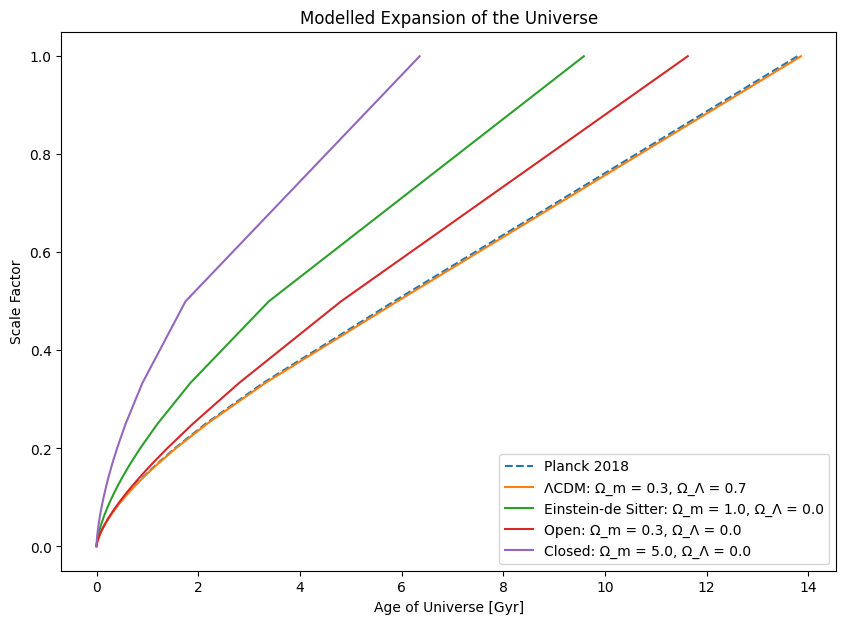

In [34]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.plot(planck_ages, planck_sf, label='Planck 2018', linestyle='dashed')
for [cosmo, label] in cosmo_list:
  plot_cosmo(cosmo, label, zvals)

ax.legend()
ax.set_title('Modelled Expansion of the Universe')
ax.set_xlabel('Age of Universe [Gyr]')
ax.set_ylabel('Scale Factor')
plt.show()

Discussion about the plot:

1. Observe the range in scale factor. Unfortunately we can't go beyond this (i.e. "forwards in time") with astropy
2. The Lambda-CDM model, with our chosen parameter balues, matches observational data very closely
3. Substantial difference in age of universe. How do the shapes of the curves look?